Import all necesary libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

Read the file and project 10 rows  (taken file which is cleaned further and saved from last week)

In [4]:
df = pd.read_csv("processed_churn_data.csv")

df.tail(10)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_TotalCharges_Ratio
7022,38,1,Month-to-month,Credit card (automatic),69.50,2625.25,0,0.026474
7023,67,1,Month-to-month,Credit card (automatic),102.95,6886.25,1,0.014950
7024,19,1,Month-to-month,Bank transfer (automatic),78.70,1495.10,0,0.052639
7025,12,0,One year,Electronic check,60.65,743.30,0,0.081596
7026,72,1,Two year,Bank transfer (automatic),21.15,1419.40,0,0.014901
7027,24,1,One year,Mailed check,84.80,1990.50,0,0.042602
7028,72,1,One year,Credit card (automatic),103.20,7362.90,0,0.014016
7029,11,0,Month-to-month,Electronic check,29.60,346.45,0,0.085438
7030,4,1,Month-to-month,Mailed check,74.40,306.60,1,0.242661
7031,66,1,Two year,Bank transfer (automatic),105.65,6844.50,0,0.015436


Get dummies and it will make the bool data type to float

In [5]:
PM_dummies = pd.get_dummies(df['PaymentMethod'], prefix='PaymentMethod')
C_dummies = pd.get_dummies(df['Contract'], prefix='Contract')

df = pd.concat([df, PM_dummies, C_dummies], axis=1)

df.head(5)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_TotalCharges_Ratio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,Month-to-month,Electronic check,29.85,29.85,0,1.000000,False,False,True,False,True,False,False
1,34,1,One year,Mailed check,56.95,1889.50,0,0.030140,False,False,False,True,False,True,False
2,2,1,Month-to-month,Mailed check,53.85,108.15,1,0.497920,False,False,False,True,True,False,False
3,45,0,One year,Bank transfer (automatic),42.30,1840.75,0,0.022980,True,False,False,False,False,True,False
4,2,1,Month-to-month,Electronic check,70.70,151.65,1,0.466205,False,False,True,False,True,False,False


In [6]:
dummies = ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PaymentMethod_Credit card (automatic)']

for column in dummies:
    df[column] = pd.factorize(df[column])[0]

df.head(5)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_TotalCharges_Ratio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,Month-to-month,Electronic check,29.85,29.85,0,1.000000,0,0,0,0,0,0,0
1,34,1,One year,Mailed check,56.95,1889.50,0,0.030140,0,0,1,1,1,1,0
2,2,1,Month-to-month,Mailed check,53.85,108.15,1,0.497920,0,0,1,1,0,0,0
3,45,0,One year,Bank transfer (automatic),42.30,1840.75,0,0.022980,1,0,1,0,1,1,0
4,2,1,Month-to-month,Electronic check,70.70,151.65,1,0.466205,0,0,0,0,0,0,0


In [7]:
df = df.drop(['PaymentMethod', 'Contract'], axis=1)
df

,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_TotalCharges_Ratio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,29.85,29.85,0,1.000000,0,0,0,0,0,0,0
1,34,1,56.95,1889.50,0,0.030140,0,0,1,1,1,1,0
2,2,1,53.85,108.15,1,0.497920,0,0,1,1,0,0,0
3,45,0,42.30,1840.75,0,0.022980,1,0,1,0,1,1,0
4,2,1,70.70,151.65,1,0.466205,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24,1,84.80,1990.50,0,0.042602,0,0,1,1,1,1,0
7028,72,1,103.20,7362.90,0,0.014016,0,1,1,0,1,1,0
7029,11,0,29.60,346.45,0,0.085438,0,0,0,0,0,0,0
7030,4,1,74.40,306.60,1,0.242661,0,0,1,1,0,0,0


In [8]:
df.isna().sum()

tenure                                     0
PhoneService                               0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
MonthlyCharges_to_TotalCharges_Ratio       0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
dtype: int64

Break up data into features and targets

In [9]:
X = df.drop('Churn', axis=1)
y = df['Churn']

Split data into train and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Use at least one ML model to fit to the training data Apply regression to our train model

In [11]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [12]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8019555555555555
0.7803837953091685


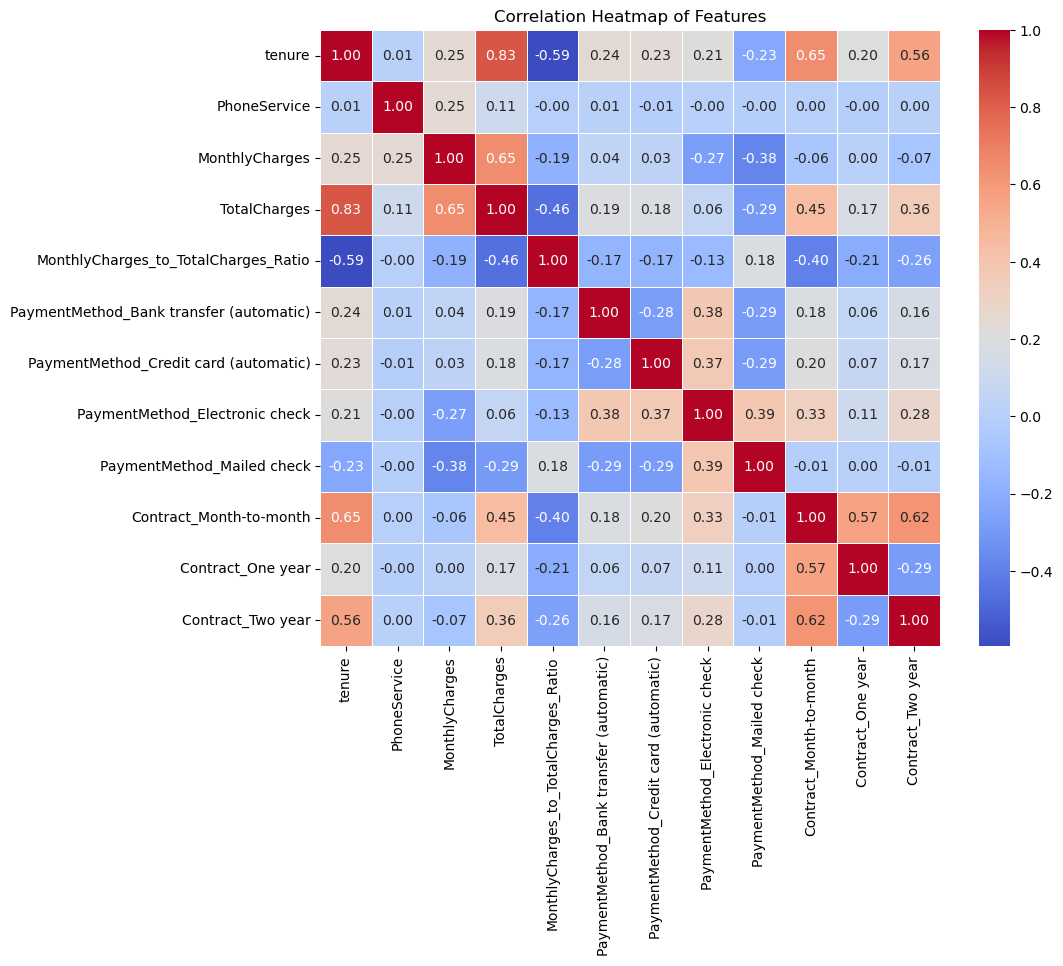

In [13]:
# Filter out non-numeric columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
corr = X[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


Prediction

In [14]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [15]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')



Accuracy: 0.78
Confusion Matrix:
[[919 114]
 [195 179]]


Confusion matrix

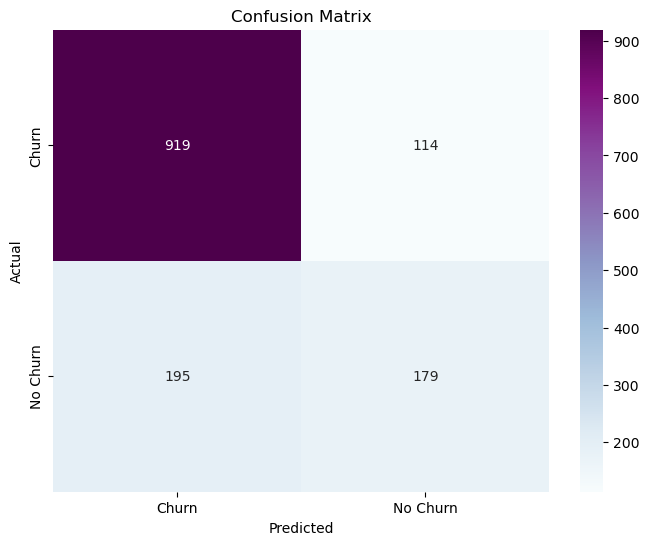

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', 
            xticklabels=['Churn', 'No Churn'], yticklabels=['Churn', 'No Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Evaluate performance on the train and test sets: at least evaluate accuracy and compare it with the "no information rate"

In [17]:
no_info_rate = max(y_train.value_counts(normalize=True))
print(f'No Information Rate: {no_info_rate}')

No Information Rate: 0.7342222222222222


This will give you the accuracy achieved by simply predicting the majority class (No Churn).

To improve the model performance - Tune it

In [18]:
model.predict_proba(X_test)

array([[0.99554818, 0.00445182],
       [0.90936709, 0.09063291],
       [0.40680547, 0.59319453],
       ...,
       [0.93855042, 0.06144958],
       [0.70336967, 0.29663033],
       [0.99660846, 0.00339154]])

1 indicates that the model predicts the sample belongs to the positive class with high confidence.
0 indicates that the model predicts the sample does not belong to the positive class with high confidence.

In [19]:
predictions_lt = (model.predict_proba(X_test)[:10, 1] > 0.15).astype('int')
predictions_lt

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0])

Using low threshold

In [20]:
predictions_lt = (model.predict_proba(X_test)[:, 1] > 0.15).astype('int')
print(accuracy_score(y_test, predictions_lt))


0.6609808102345416


Accuracy score of around 66.1% means that the model correctly predicted the outcome for about 66.1% of the samples in the test set.

So, out of all the samples tested, approximately 66.1% were accurately classified by the model.

In [21]:
tn, fp, fn, tp  = confusion_matrix(y_test, predictions_lt).flatten()
print(tp / (tp + fn))

0.9117647058823529


The true positive rate (TP rate) is a measure that shows how well a model predicts positive instances correctly out of all actual positive instances. It's calculated by dividing the number of true positives by the sum of true positives and false negatives.

In this case, the true positive rate is around 91.18%, indicating that the model correctly predicted approximately 91.18% of the positive cases in the test dataset.

In [22]:
model.coef_

array([[-0.61799685, -0.29046784,  1.01814634,  0.03503939,  0.43600736,
        -0.00847065, -0.0636525 , -0.15230167, -0.10044379, -0.45567171,
        -0.06479923, -0.46929463]])

<Axes: >

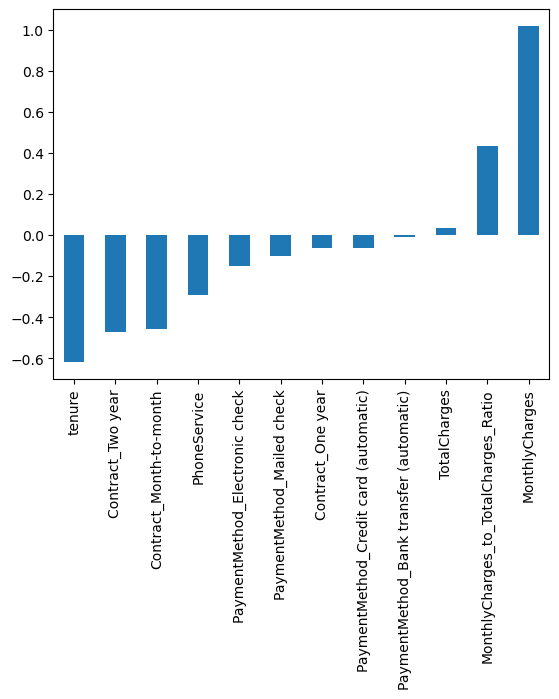

In [23]:
coef_df = pd.DataFrame(data=model.coef_, columns=X.columns)

coef_df.T.sort_values(by=0).plot.bar(legend=False)

Plot Interpretation

The plot displays the coefficients of each feature in a bar chart format, providing insights into their impact on the target variable.

- Features with positive coefficients are represented by bars pointing upwards, indicating a positive association with the target variable (churn).
- Conversely, features with negative coefficients are depicted by bars pointing downwards, indicating a negative association with churn.
- The length of each bar signifies the magnitude of the coefficient, reflecting the strength of the feature's influence on churn prediction.
- Features with longer bars, such as MonthlyCharges and tenure, exert a more significant influence on the model's predictions.
- Positive coefficient features, like MonthlyCharges, contribute positively to the likelihood of churn, while those with negative coefficients have a negative impact.
- Understanding the coefficients and the plot aids in discerning the relative importance of different features in predicting churn, informing strategies to mitigate churn and enhance customer retention efforts.

Summary

Utilizing demographic and churn data, I successfully developed a predictive model for churn using machine learning techniques. Minimal data preprocessing was conducted: I encoded categorical string columns (such as Contract, PhoneService, and Payment method) into numeric values and removed the 'customerID' column as it was unnecessary for our analysis. Through exploration, I observed a correlation between higher monthly fees and increased churn rates, which aligns with industry trends in the telecom sector.

The model was trained using logistic regression, and when evaluated on the test data, it achieved an accuracy of 80%, surpassing the baseline accuracy of 73% ("No Information" rate). This performance indicates promising potential for the model in predicting churn effectively. Further analysis and fine-tuning could enhance its predictive capabilities and contribute to informed decision-making processes in customer retention strategies.